In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from scipy.interpolate import make_interp_spline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import folium
from folium.plugins import HeatMap

# Loading Data

In [44]:
np.random.seed(42)
students = pd.DataFrame({
    'Hours_Studied': np.random.uniform(1, 10, 50),
    'Exam_Score': np.random.uniform(40, 100, 50)
})
students['Income'] = np.random.uniform(20_000, 120_000, 50)
students['Spending'] = np.random.uniform(5_000, 50_000, 50)
students['Purchases'] = np.random.randint(1, 30, 50)
students['Customer_Segment'] = np.random.choice(['A', 'B', 'C'], size=50)
students.head()

,Hours_Studied,Exam_Score,Income,Spending,Purchases,Customer_Segment
0,4.370861,98.175078,23142.918569,45871.964868,24,B
1,9.556429,86.507969,83641.041126,15780.285080,20,C
2,7.587945,96.369936,51435.598108,11520.269244,11,C
3,6.387926,93.689641,70857.069116,27025.374212,17,B
4,2.404168,75.873999,110756.647393,49354.270435,8,A


# Basic Scatter Plot

**Syntax**
```py
plt.scatter(x_list, y_list)
```

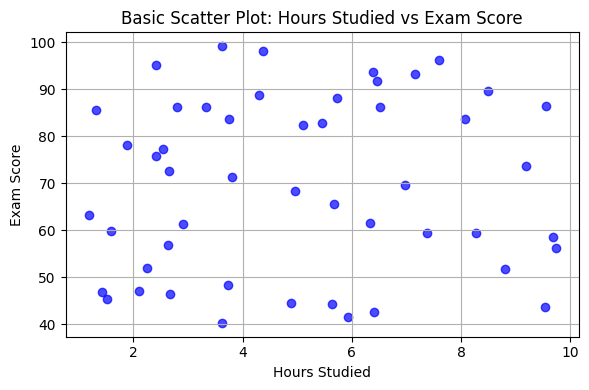

In [45]:
plt.figure(figsize=(6, 4))
plt.scatter(students['Hours_Studied'], students['Exam_Score'], color='blue', alpha=0.7)
plt.title("Basic Scatter Plot: Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True)
plt.tight_layout()
plt.show()


# Bubble Chart (3D Scatter Plot)

**Syntax**
```py
plt.scatter(x_list, y_list, sizes, colors, alpha)
```
- Why is the visualization in 2D?
- The 3D here means position (x, y) shows 2 variables (Income, Spending)
- But he bubble size and color also represents other 2 variables

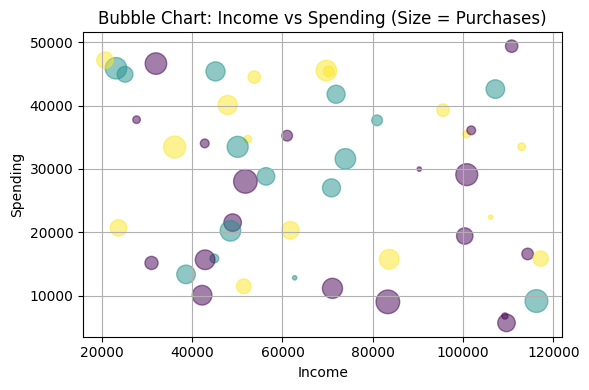

In [46]:
plt.figure(figsize=(6, 4))
sizes = students['Purchases'] * 10  # bubble size
colors = students['Customer_Segment'].astype('category').cat.codes  # color by segment
plt.scatter(students['Income'], students['Spending'], s=sizes, c=colors, alpha=0.5, cmap='viridis')
plt.title("Bubble Chart: Income vs Spending (Size = Purchases)")
plt.xlabel("Income")
plt.ylabel("Spending")
plt.grid(True)
plt.tight_layout()
plt.show()


How to make actual 3d scatter plot?

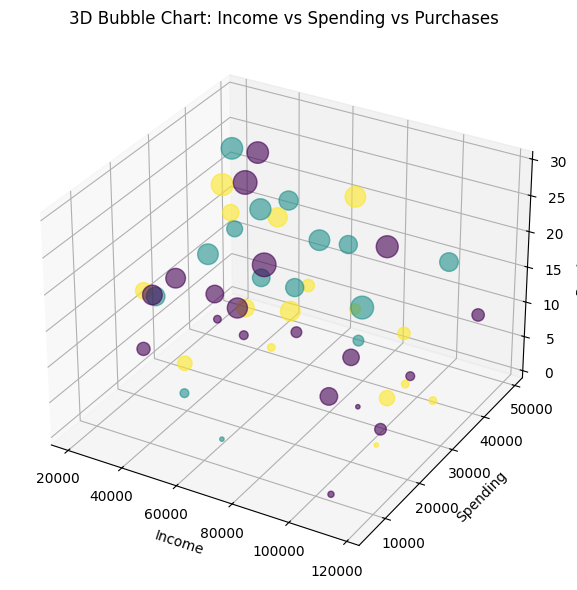

In [58]:
# Prepare data
x = students['Income']
y = students['Spending']
z = students['Purchases']
sizes = z * 10  # Bubble size
colors = students['Customer_Segment'].astype('category').cat.codes  # Color by category

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter
scatter = ax.scatter(x, y, z, c=colors, s=sizes, cmap='viridis', alpha=0.6)

# Set axis labels
ax.set_title("3D Bubble Chart: Income vs Spending vs Purchases")
ax.set_xlabel("Income")
ax.set_ylabel("Spending")
ax.set_zlabel("Purchases")

plt.tight_layout()
plt.show()

# Scatter Matrix

**Syntax**
```
scatter_matrix(data_frame)
```

<Figure size 800x800 with 0 Axes>

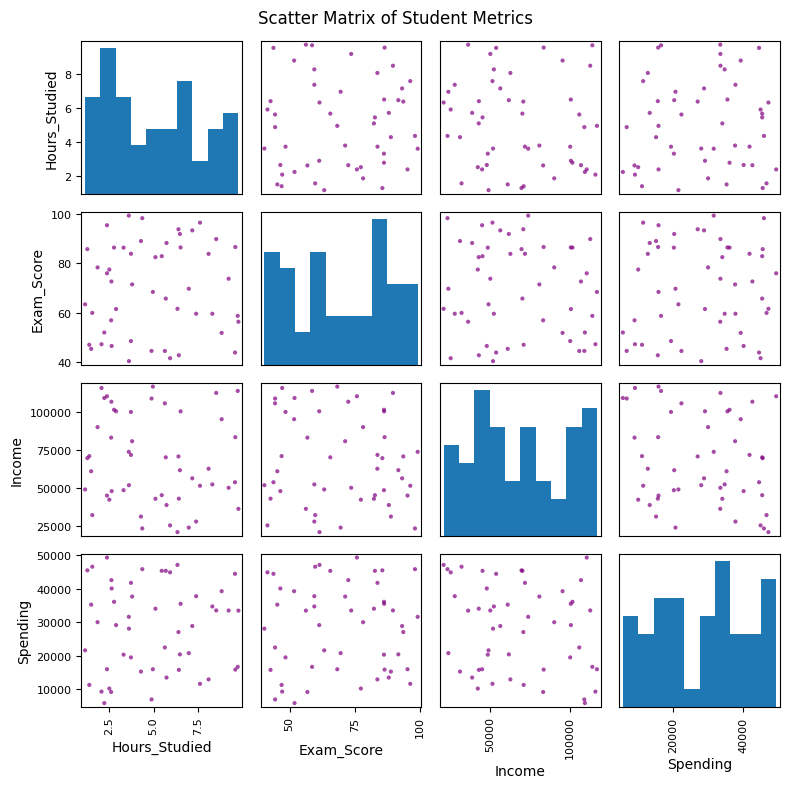

In [61]:
plt.figure(figsize=(8, 8))
scatter_matrix(students[['Hours_Studied', 'Exam_Score', 'Income', 'Spending']], alpha=0.7, figsize=(8, 8), diagonal='hist', color='purple')
plt.suptitle("Scatter Matrix of Student Metrics")
plt.tight_layout()
plt.show()

# Regression Lines

Perform linear regression on hours studied and exam score. Fit a line based on the regression and predict the exam score if user studies for 8.5 hours.



# Linear Regression Without using any library

$
m = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$

$
c = \bar{y} - m \cdot \bar{x}
$

$
\hat{y} = m \cdot x + c
$

slope (m) =  0.44051099532051213
y intercept (c) =  67.45783449987954
Y predictions based on x =  [69.38324686 71.66754644 70.80040791 70.2717863  68.51689683 68.51680121
 68.12862372 71.33238654 70.28152544 70.7055693  67.97995476 71.74364908
 71.19864672 68.74018491 68.61920857 68.62547082 69.10454397 69.9787943
 69.61083427 69.05295224 70.32409684 68.45138271 69.05658186 69.35082328
 69.70648008 71.01125329 68.68997196 69.93707881 70.24703168 68.08250275
 70.30701718 68.57440526 68.15624897 71.66029611 71.72668925 71.10331678
 69.10601693 68.28557626 70.61105504 69.64337361 68.38217815 69.86152336
 68.03468219 71.50343621 68.92430434 70.52498065 69.1341549  69.96020663
 70.0658325  68.63121928]
New Y if x is 8.5 =   71.2021779601039


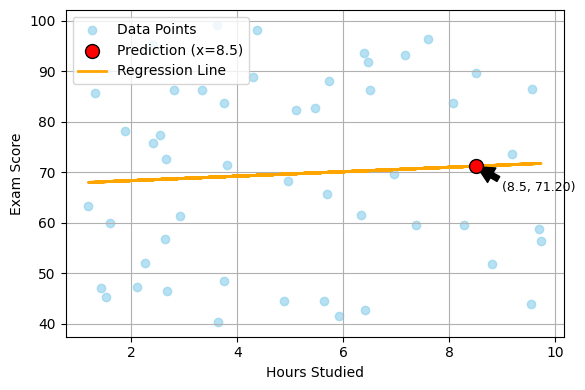

In [49]:
x = students["Hours_Studied"].values
y = students["Exam_Score"].values

x_bar = np.mean(x)
y_bar = np.mean(y)

# Formula
numerator = np.sum((x - x_bar)*(y - y_bar))
denominator = np.sum((x - x_bar) ** 2)
m = numerator / denominator


c = y_bar - m * x_bar

y_pred = m * x + c


new_x = 8.5
new_y = m * new_x + c


print("slope (m) = ", m)
print("y intercept (c) = ", c)
print("Y predictions based on x = ", y_pred)
print("New Y if x is 8.5 =  ", new_y)

# Draw the regression line based x, y_pred but the scatter plot based on x, y
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(x, y, color='skyblue', label='Data Points', alpha=0.6)

# Plot the predicted point
plt.scatter(new_x, new_y, color='red', s=100, label=f'Prediction (x={new_x})', edgecolor='black', zorder=5)

# Annotate the predicted point
plt.annotate(f"({new_x}, {new_y:.2f})", xy=(new_x, new_y), xytext=(new_x + 0.5, new_y - 5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=9)

plt.plot(x, y_pred, color='orange', linewidth=2, label='Regression Line')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Linear Regression with Skilearn

slope (m) =  0.44051099532051236
y intercept (c) =  67.45783449987954
Y predictions based on x =  [69.38324686 71.66754644 70.80040791 70.2717863  68.51689683 68.51680121
 68.12862372 71.33238654 70.28152544 70.7055693  67.97995476 71.74364908
 71.19864672 68.74018491 68.61920857 68.62547082 69.10454397 69.9787943
 69.61083427 69.05295224 70.32409684 68.45138271 69.05658186 69.35082328
 69.70648008 71.01125329 68.68997196 69.93707881 70.24703168 68.08250275
 70.30701718 68.57440526 68.15624897 71.66029611 71.72668925 71.10331678
 69.10601693 68.28557626 70.61105504 69.64337361 68.38217815 69.86152336
 68.03468219 71.50343621 68.92430434 70.52498065 69.1341549  69.96020663
 70.0658325  68.63121928]
New Y if x is 8.5 =   71.2021779601039


e:\projects\work\teaching\dav\data-analysis-and-visualization-bca-2025\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


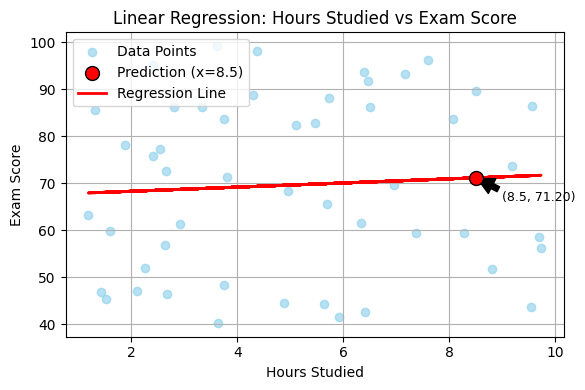

In [50]:

# Prepare data for LinearRegression
x = students[['Hours_Studied']]  # must be 2D for sklearn
y = students['Exam_Score']

# Create and train the model
model = LinearRegression()
model.fit(x, y)

# Predict using the model
y_pred = model.predict(x)

# Display slope (coefficient) and intercept
m = model.coef_[0] # slope
c = model.intercept_ # y intercept

new_x = 8.5
new_y = model.predict([[new_x]])[0]

print("slope (m) = ", m)
print("y intercept (c) = ", c)
print("Y predictions based on x = ", y_pred)
print("New Y if x is 8.5 =  ", new_y)

# Plotting
plt.figure(figsize=(6, 4))

# Plot the original data points
plt.scatter(x, y, color='skyblue', label='Data Points', alpha=0.6)

# Plot the predicted point
plt.scatter(new_x, new_y, color='red', s=100, label=f'Prediction (x={new_x})', edgecolor='black', zorder=5)

# Annotate the predicted point
plt.annotate(f"({new_x}, {new_y:.2f})", xy=(new_x, new_y), xytext=(new_x + 0.5, new_y - 5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=9)



plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Linear Regression: Hours Studied vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Line Charts

In [51]:
days = np.arange(1, 8)
sales_A = np.array([100, 120, 130, 115, 150, 160, 170])
sales_B = np.array([90, 100, 125, 110, 130, 140, 145])
sales_C = np.array([80, 85, 95, 105, 110, 115, 120])

# Basic Line Chart

**Syntax**
```py
plt.plot(X, Y)
```

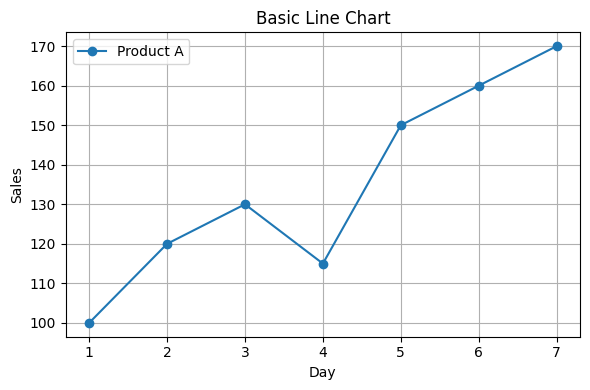

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(days, sales_A, marker='o', label='Product A')
plt.title("Basic Line Chart")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Multi-Series Line Chart

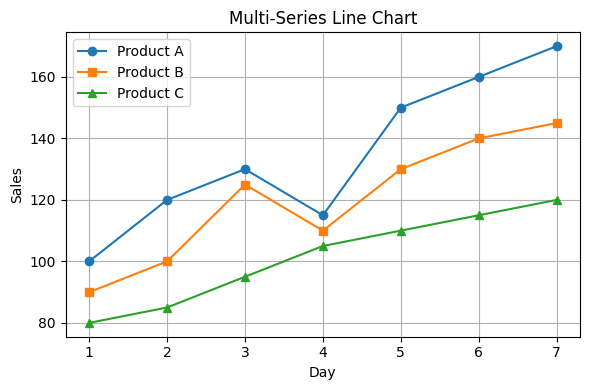

In [53]:
plt.figure(figsize=(6, 4))
plt.plot(days, sales_A, marker='o', label='Product A')
plt.plot(days, sales_B, marker='s', label='Product B')
plt.plot(days, sales_C, marker='^', label='Product C')
plt.title("Multi-Series Line Chart")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Stacked Area Chart
```py
plt.stackplot(X, Y1, Y2, Y3)
```

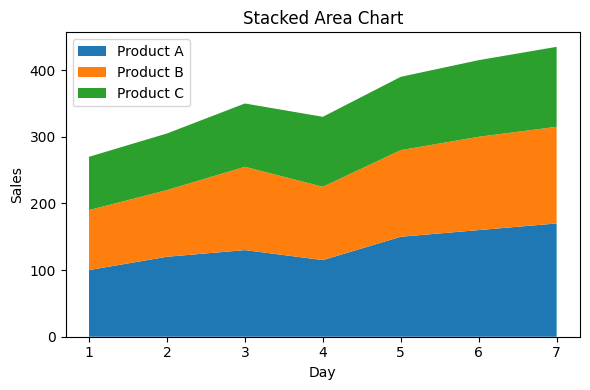

In [ ]:
plt.figure(figsize=(6, 4))
plt.stackplot(days, sales_A, sales_B, sales_C, labels=['Product A', 'Product B', 'Product C'])
plt.title("Stacked Area Chart")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Smooth (Spline) Line Chart


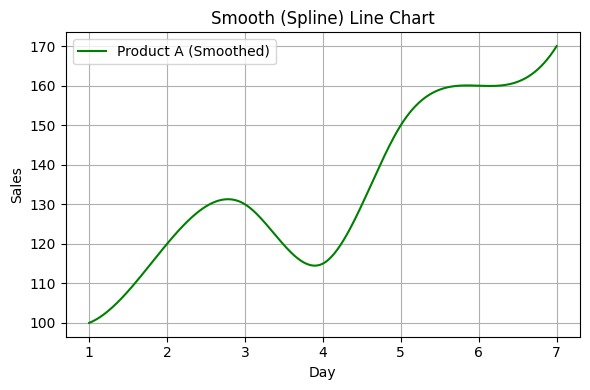

In [55]:
x_smooth = np.linspace(days.min(), days.max(), 300)  # more points for smooth curve
y_smooth = make_interp_spline(days, sales_A)(x_smooth)  # spline interpolation

plt.figure(figsize=(6, 4))
plt.plot(x_smooth, y_smooth, label='Product A (Smoothed)', color='green')
plt.title("Smooth (Spline) Line Chart")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step Chart
**Syntax**
```py
plt.step(x, y, where='pre' | 'mid' | 'post')
```

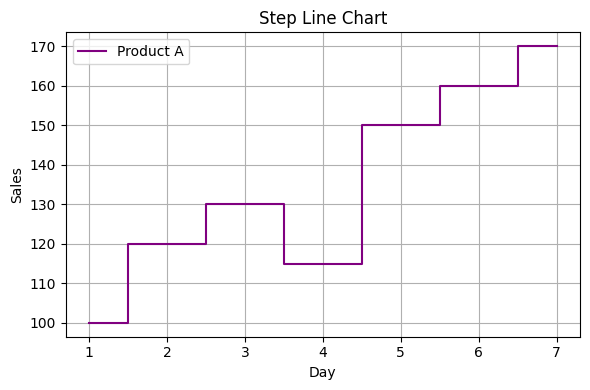

In [56]:
plt.figure(figsize=(6, 4))
plt.step(days, sales_A, where='mid', label='Product A', color='purple')
plt.title("Step Line Chart")
plt.xlabel("Day")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Heatmap
Creating Heatmaps with matplotlib is complicated, hence we use sns instead

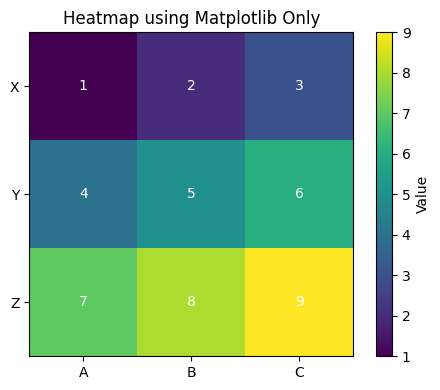

In [62]:
# Sample 2D data (e.g., correlation matrix or confusion matrix)
data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])



plt.figure(figsize=(5, 4))
plt.imshow(data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        plt.text(j, i, f"{data[i, j]}", ha='center', va='center', color='white')

plt.title("Heatmap using Matplotlib Only")
plt.xticks(ticks=[0, 1, 2], labels=['A', 'B', 'C'])
plt.yticks(ticks=[0, 1, 2], labels=['X', 'Y', 'Z'])
plt.tight_layout()
plt.show()



Same with seaborn `sns`

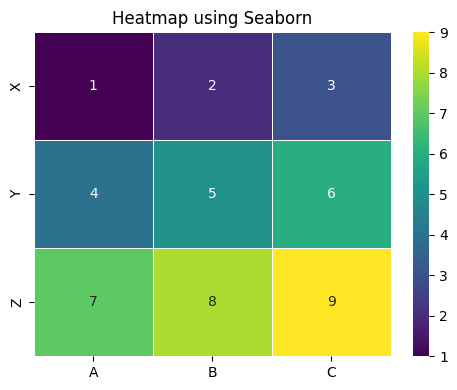

In [64]:
# Sample data
data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Convert to DataFrame for better labeling
df = pd.DataFrame(data, index=['X', 'Y', 'Z'], columns=['A', 'B', 'C'])

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(df, annot=True, cmap='viridis', fmt="d", linewidths=0.5, linecolor='white')
plt.title("Heatmap using Seaborn")
plt.tight_layout()
plt.show()

# Simple Heatmap

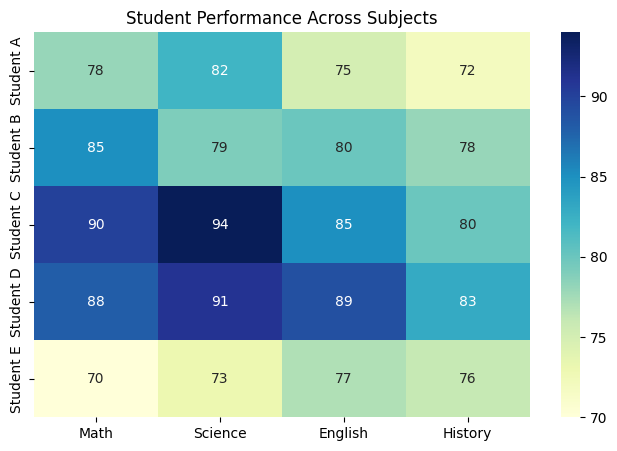

In [65]:
# Sample data: average scores for students across subjects
data = {
    'Math': [78, 85, 90, 88, 70],
    'Science': [82, 79, 94, 91, 73],
    'English': [75, 80, 85, 89, 77],
    'History': [72, 78, 80, 83, 76]
}
students = ['Student A', 'Student B', 'Student C', 'Student D', 'Student E']

df = pd.DataFrame(data, index=students)

plt.figure(figsize=(8, 5))
sns.heatmap(df, annot=True, cmap='YlGnBu')
plt.title("Student Performance Across Subjects")
plt.show()

# Correlation Heatmap

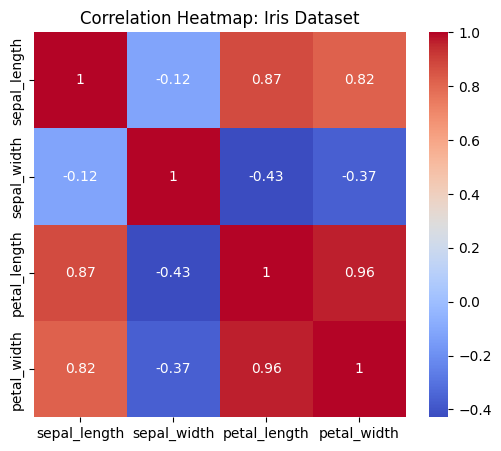

In [67]:
df = sns.load_dataset('iris').drop('species', axis=1)

plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Iris Dataset")
plt.show()

                Hours of Sleep  Stress Level  Screen Time  Mood Score
Hours of Sleep        1.000000     -0.935761    -0.952084    0.767293
Stress Level         -0.935761      1.000000     0.828289   -0.614465
Screen Time          -0.952084      0.828289     1.000000   -0.779990
Mood Score            0.767293     -0.614465    -0.779990    1.000000


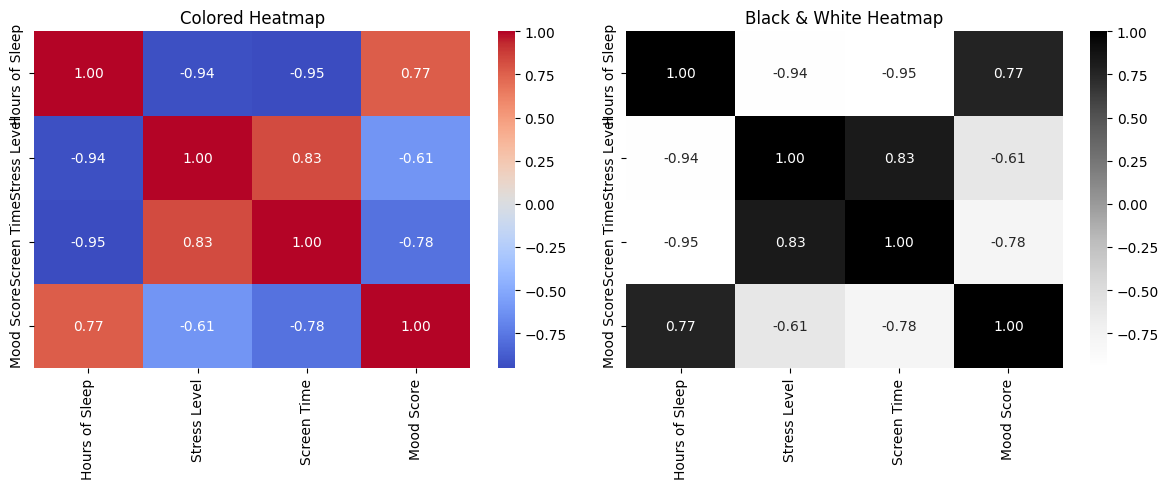

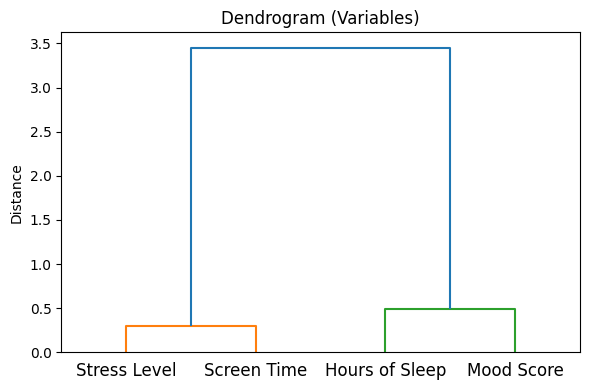

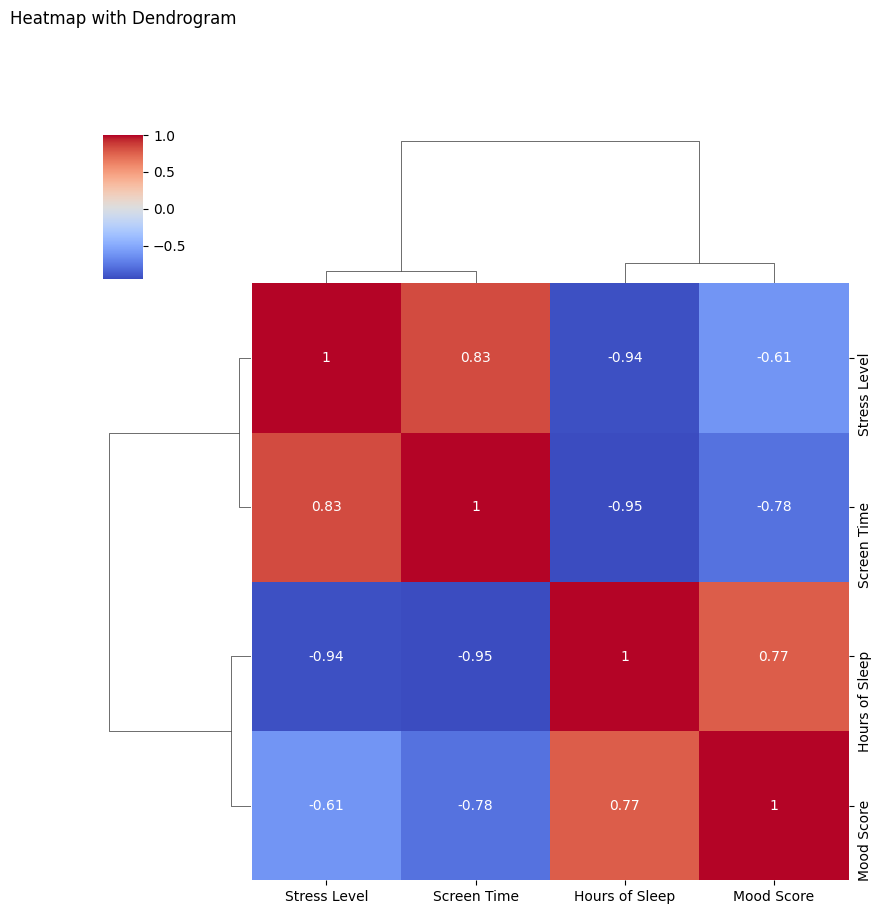

In [72]:
# Step 1: Create the dataset
data = {
    'Hours of Sleep': [7, 6.3, 7.14, 8, 6.2],
    'Stress Level': [2.1, 6.4, 2.8, 0.3, 4.9],
    'Screen Time': [2.4, 3.4, 1.5, 0.5, 4.7],
    'Mood Score': [6.88, 6.68, 6.16, 7.65, 5.37]
}
df = pd.DataFrame(data)

# Step 2: Correlation matrix
corr_matrix = df.corr()

print(corr_matrix)

# Step 3: Plot simple heatmaps (color and B/W)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Colored heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Colored Heatmap")

# Black & White heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Greys', fmt=".2f", ax=axes[1])
axes[1].set_title("Black & White Heatmap")

plt.tight_layout()
plt.show()

# Step 4: Dendrogram (separate from heatmap)
plt.figure(figsize=(6, 4))
linkage = sch.linkage(pdist(corr_matrix), method='average')
sch.dendrogram(linkage, labels=corr_matrix.columns)
plt.title("Dendrogram (Variables)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Step 5: Heatmap with dendrogram (Clustermap)
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', figsize=(8, 8))
plt.title("Heatmap with Dendrogram", pad=80)
plt.show()

# Clustured Heatmap

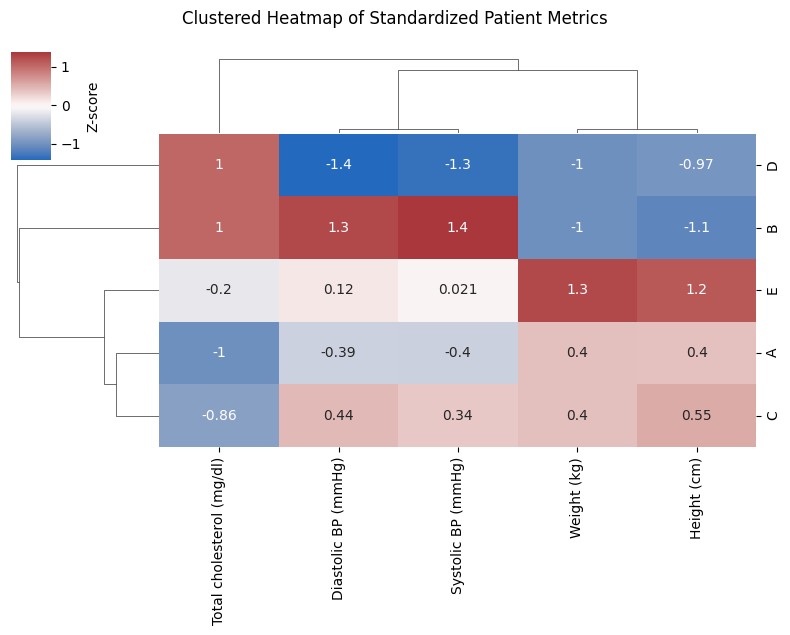

In [73]:
# Step 1: Original patient data
data = {
    'A': [70, 130, 100, 180, 190],
    'B': [86, 147, 90, 170, 215],
    'C': [78, 137, 100, 181, 192],
    'D': [60, 121, 90, 171, 215],
    'E': [75, 134, 106, 185, 200]
}

metrics = [
    'Diastolic BP (mmHg)',
    'Systolic BP (mmHg)',
    'Weight (kg)',
    'Height (cm)',
    'Total cholesterol (mg/dl)'
]


df = pd.DataFrame(data, index=metrics)

# Step 2: Transpose (patients as rows, metrics as columns)
df_t = df.T

# Step 3: Standardize each metric
df_standardized = (df_t - df_t.mean()) / df_t.std()

# Step 4: Plot standardized clustered heatmap
sns.clustermap(df_standardized, cmap='vlag', annot=True, figsize=(8, 6), cbar_kws={'label': 'Z-score'})
plt.suptitle("Clustered Heatmap of Standardized Patient Metrics", y=1.05)
plt.show()

# Non spatial heatmap

In [78]:
# Sample: Wildfire lat/lon points in Nepal (simulated)
data = [
    [28.3949, 84.1240],  # Near central Nepal
    [27.7172, 85.3240],  # Kathmandu
    [29.2320, 81.8780],  # Far-west
]

# Base map centered on Nepal
m = folium.Map(location=[28.4, 84], zoom_start=7)

# Add heatmap
HeatMap(data).add_to(m)

# Show map
m.save("nepal_wildfires_heatmap.html")